## Final Project Submission

Please fill out:
* Student name: Mit Patel
* Student pace: Part Time
* Scheduled project review date/time: Jan 29th 2019 
* Instructor name: Jeff Hermam
* Blog post URL: https://mitpatel5.github.io/feature_selection


In [108]:
# Your code here - remember to use markdown cells for comments as well!
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import minmax_scale

In [109]:
# storing the data set in the Pandas DataFrame
main_df = pd.read_csv("kc_house_data.csv")

In [121]:
main_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [110]:
#Preprossecing the data removing the NaN and special charters if presrent in the field
main_df.waterfront = main_df.waterfront.fillna(0)
main_df.yr_renovated = main_df.yr_renovated.fillna(0)
main_df.view = main_df.view.fillna(0)
main_df.sqft_basement = main_df.sqft_basement.replace('?',0)
main_df.sqft_basement = main_df.sqft_basement.astype(str).astype(float)

In [111]:
#As the range of the price (i.e our dependent variable) i'm log trasnforming to normalizing
main_df['log_price'] = np.log1p(main_df.price)

In [112]:
main_df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [113]:
#if notice there is a outliner on the field bed room so we delete that outiner
main_df = main_df.drop(main_df[main_df.bedrooms > 12].index)

## Selecting the features 
I Selected the features based on the simple liner regresation and ploted agains the the new field  log_price.
Demostrating one of them below

C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


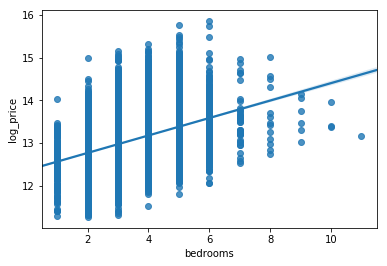

In [119]:
sn.regplot(main_df.bedrooms,main_df.log_price)

In [91]:
#As i'm using RFE all the data need to scaled in the range of 0 and 1
bedrooms = minmax_scale(main_df.bedrooms)
bathroom = minmax_scale(main_df.bathrooms)
view = minmax_scale(main_df.view)
condition = minmax_scale(main_df.condition)
sqft_above = minmax_scale(main_df.sqft_above)
sqft_basement = minmax_scale(main_df.sqft_basement)

C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [123]:
#This DataFrame in the final dataframe with all the selected feature and scaled
final_data = pd.DataFrame([])
final_data['bedrooms'] = bedrooms
final_data['bathrooms'] = bathroom
final_data['view'] = view
final_data['condition'] = condition
final_data['sqft_above'] = sqft_above
final_data['sqft_basement'] = sqft_basement
final_data = pd.concat([main_df.log_price,final_data],axis=1)
final_data = final_data.dropna()
log_price = final_data.log_price

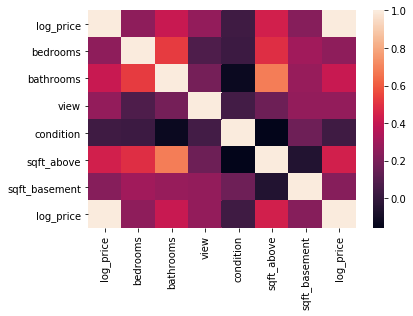

In [124]:
sn.heatmap(pd.concat([final_data,final_data.log_price],axis=1).corr())

In [122]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [126]:
outcome = 'log_price'
predictors = final_data.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [127]:
model = ols(formula= formula, data=final_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     1459.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:42:47   Log-Likelihood:                -13115.
No. Observations:               21595   AIC:                         2.624e+04
Df Residuals:                   21588   BIC:                         2.630e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.4339      0.015    832.136      0.000      12.405      12.463
bedrooms         -0.4314      0.043    -10.145      0.000      -0.515      -0.348
bathrooms         0.5212      0.046     11.355      0.000       0.431       0.611
view              0.3588      0.017     21.284      0.000       0.326       0.392
condition         0.2414      0.019     12.527      0.000       0.204       0.279
sqft_above        2.3542      0.052     45.560      0.000       2.253       2.456
sqft_basement     1.1568      0.041     28.516      0.000       1.077       1.236
==============================================================================
Omnibus:                      416.714   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              758.750
Skew:                           0.141   Prob(JB):                    1.74e-165
Kurtosis:                       3.874   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If we study the summary of OLS model we can see that R squared values for the model is 0.289 

## Feature Ranking with Recursive Feature Elimination
Scikit-Learn has few functionalities for feature selection. RFE works on the basis of assigning the weight to feature, the goal of recursive feature elimination is to select features by recursively considering smaller and smaller sets of features.

In [103]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
predictors = final_data.drop('log_price',axis=1)
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(predictors,final_data['log_price'])

the .support_ attribute returns with array of selected features

In [120]:
selector.support_

array([False, False, False, False,  True,  True])

The .ranking_ attribute returns an array of ranks for each feature based on the n_features_to_select value

In [105]:
selector.ranking_

array([2, 3, 4, 5, 1, 1])

By calling .estimator_ on the RFE object you can get access to the parameter estimate throught .coef_ and .intercept_

In [106]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[2.61788148 1.47961798]
12.549679114213173


Using the train_test_split function that is availabel in Scikit-learn. we provid the test_size parameter as 0.2 which means test set is the sample of 20% of the our original data.

In [79]:
from sklearn.model_selection import train_test_split
y = final_data.log_price
X = predictors
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
linreg.fit(X_train,y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Now i'm using the sklearn function for finding the mean square error 

In [80]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train,y_hat_train)
test_mse = mean_squared_error(y_test,y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.24919533363310273
Test Mean Squarred Error: 0.25438937054929395


For cross validation of the model we use k-fold cross validation 

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [82]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.268486601802703
-0.25823587501390116
-0.25397794652077305


## Observation

By the out of the k fold cross validation has values in the range of the -0.24 to -0.27 so the model accurcy will be 76% to 73%